<a href="https://colab.research.google.com/github/Helzheng123/sqlite_database_operations/blob/main/sqlite_database_operations_hha504_wk3hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Databases with **SQLite**



### 1. Data Exploration and Analysis:

##### Loading Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sqlite3

##### Import pricing transparency datasets of two hospitals: St.Francis Hospital & Heart Center and New York Presbyterian Hospital

In [2]:
df_stfrancis = pd.read_excel('1043279565_st.-francis-hospital_standardcharges.xlsx')
df_stfrancis

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65027,6370000002,XRX ZONISAMIDE 25 MG PO CAPS,250,NaN,316.0,62756-258-02,100.0,each,Bottle,100 each
65028,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,0378-6726-01,100.0,each,Bottle,100 each
65029,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,62756-259-02,100.0,each,Bottle,100 each
65030,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,68001-243-00,100.0,each,Bottle,100 each


In [3]:
df_nyp = pd.read_json('133957095_NewYorkPresbyterianHospital_standardcharges.json')
df_nyp

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


##### Checking missing values in both datasets

In [4]:
# Missing values in St.francis

missing_values = df_stfrancis.isnull().sum()
missing_values

Billing/Charge Code        0
Charge Description         0
Rev Code                   0
CPT/HCPC               14512
Price                     92
NDC                    52320
Package Size           52320
Package Unit           52320
Package Description    52383
Charge Quantity        52320
dtype: int64

In [5]:
# Missing values in NYP

missing_values = df_nyp.isnull().sum()
missing_values

Code (CPT/DRG)                          0
Description                             0
Rev Code                                0
Inpatient/Outpatient                    0
Gross Charges                           0
Discounted Cash Price                   0
Aetna                                   0
Cigna                                   0
Empire Blue Cross Blue Shield           0
Emblem Health                           0
United Health Group                     0
Aetna Medicare                          0
AgeWell Medicare                        0
Emblem Medicare                         0
Empire Medicare                         0
Fidelis Medicare                        0
Healthfirst Medicare                    0
UHC Community Plan/United Medicare      0
VNS Medicare                            0
WellCare Medicare                       0
1199                                    0
Affinity Molina Essential               0
Affinity Molina Medicaid/CHP            0
Amida Care Medicaid               

In [6]:
# Drop missing values in St.Francis

dfsf = df_stfrancis.dropna()
dfsf


,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
52320,6360000001,XRX (NICU) BEVACIZUMAB INTRAVITREAL INJECTION ...,636,C9257,35.0,99999-006-50,0.025,mL,Syringe,.025 mL
52332,6360000001,XRX ABATACEPT 125 MG/ML SC SOSY,636,J0129,8744.0,0003-2188-11,1.000,mL,Syringe,1 mL
52333,6360000001,XRX ABATACEPT 250 MG IV SOLR,636,J0129,8984.0,0003-2187-13,1.000,each,Vial,1 each
52334,6360000001,XRX ABCIXIMAB 2 MG/ML IV SOLN,636,J0130,9303.0,57894-200-01,5.000,mL,Vial,5 mL
52335,6360349002,XRX ABEMACICLIB 100 MG PO TABS,636,C9399,23764.0,0002-4815-54,14.000,each,Box,14 each
...,...,...,...,...,...,...,...,...,...,...
65006,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,1622.0,67457-619-10,100.000,mL,Vial,100 mL
65007,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2070.0,55111-688-52,100.000,mL,Bottle,100 mL
65008,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2415.0,25021-830-82,100.000,mL,Flex Cont,100 mL
65009,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,5717.0,23155-186-31,100.000,mL,Bottle,100 mL


In [7]:
# Drop missing values for NYP

dfnyp = df_nyp.dropna()
dfnyp

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


##### Descriptive Statistics:

In [8]:
# Descriptive Stats for St. Francis

dfsf.describe()

,Billing/Charge Code,Rev Code,Price,Package Size
count,4.140000e+03,4140.000000,4140.000000,4140.000000
mean,6.195973e+09,618.588406,3624.753382,62.376016
std,7.610532e+08,78.393366,18289.269447,183.825265
min,2.500000e+09,250.000000,1.000000,0.025000
25%,6.360000e+09,636.000000,38.000000,1.000000
50%,6.360000e+09,636.000000,133.000000,5.000000
75%,6.360000e+09,636.000000,781.750000,50.000000
max,6.370000e+09,636.000000,431958.000000,5000.000000


In [9]:
# Descriptive Stats for NYP

dfnyp.describe()

,Gross Charges,Discounted Cash Price,Minimum Negotiated Charge,Maximum Negotiated Charge
count,5.912000e+03,5.912000e+03,5912.000000,5.912000e+03
mean,3.355080e+04,3.355080e+04,2249.918880,2.390277e+04
std,9.718759e+04,9.718759e+04,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,0.454400,1.608000e+00
25%,5.835000e+02,5.835000e+02,122.228437,6.380010e+02
50%,3.968000e+03,3.968000e+03,431.142905,4.086731e+03
75%,3.163600e+04,3.163600e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,204861.126000,1.713460e+06


##### Frequency counts (categorical):

In [10]:
categorical_columns_sf = dfsf.select_dtypes(exclude=['number'])
categorical_columns_sf

,Charge Description,CPT/HCPC,NDC,Package Unit,Package Description,Charge Quantity
52320,XRX (NICU) BEVACIZUMAB INTRAVITREAL INJECTION ...,C9257,99999-006-50,mL,Syringe,.025 mL
52332,XRX ABATACEPT 125 MG/ML SC SOSY,J0129,0003-2188-11,mL,Syringe,1 mL
52333,XRX ABATACEPT 250 MG IV SOLR,J0129,0003-2187-13,each,Vial,1 each
52334,XRX ABCIXIMAB 2 MG/ML IV SOLN,J0130,57894-200-01,mL,Vial,5 mL
52335,XRX ABEMACICLIB 100 MG PO TABS,C9399,0002-4815-54,each,Box,14 each
...,...,...,...,...,...,...
65006,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,J3489,67457-619-10,mL,Vial,100 mL
65007,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,J3489,55111-688-52,mL,Bottle,100 mL
65008,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,J3489,25021-830-82,mL,Flex Cont,100 mL
65009,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,J3489,23155-186-31,mL,Bottle,100 mL


In [11]:
categorical_columns_nyp = dfnyp.select_dtypes(exclude=['number'])
categorical_columns_nyp

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,United Health Group,Aetna Medicare,...,United Community Plan Medicaid,VNS Medicaid,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,641.706,494.486,640.84,1388.424,260.25,253.04825,...,343.621236,343.621236,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,265.278,204.418,264.92,1305.112,102.2262,51.90325,...,796.356536,796.356536,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1035.177,797.687,1033.78,1475.508,518.9732,253.04825,...,343.621236,343.621236,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,355.68,274.08,355.2,1325.12,229.7834,82.65075,...,343.621236,343.621236,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,355.68,274.08,355.2,1325.12,156.9828,Not separately payable,...,343.621236,343.621236,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,86723.5232,98911.694706,82299.84,115129.89148,102929.0034,23652.668356,...,20935.240045,24075.526052,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,57748.8352,65864.888166,63931.455093,76664.51828,68539.9974,15897.510465,...,13056.244756,15014.68147,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,114736.9984,130862.199072,214294.876425,152319.20576,136177.1808,31150.554899,...,35027.99805,40282.197758,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,58654.7264,66898.093812,91907.6928,77867.13496,69615.1668,16139.974829,...,17382.380098,19989.737113,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646


In [12]:
# Frequency Counts for St.Francis

charge_description_counts = dfsf['Charge Description '].value_counts()
package_description_counts = dfsf['Package Description'].value_counts()
cpt_counts = dfsf['CPT/HCPC'].value_counts()
ndc_counts = dfsf['NDC'].value_counts()
package_unit_counts = dfsf['Package Unit'].value_counts()
charge_quantity_counts = dfsf['Charge Quantity'].value_counts()

print("Value Counts for 'Charge Description':")
print(charge_description_counts)

print("\nValue Counts for 'Package Description':")
print(package_description_counts)

print("\nValue Counts for 'CPT/HCPC':")
print(cpt_counts)

print("\nValue Counts for 'NDC':")
print(ndc_counts)

print("\nValue Counts for 'Package Unit':")
print(package_unit_counts)

print("\nValue Counts for 'Charge Quantity':")
print(charge_quantity_counts)


Value Counts for 'Charge Description':
XRX FENTANYL CITRATE 50 MCG/ML IJ SOLN (WRAPPER)     33
XRX FUROSEMIDE 10 MG/ML IJ SOLN                      33
XRX SODIUM CHLORIDE 0.9 % IV SOLN                    32
XRX HEPARIN SODIUM (PORCINE) 1000 UNIT/ML IJ SOLN    23
XRX DOXORUBICIN HCL 2 MG/ML IV SOLN                  23
                                                     ..
XRX GLUCARPIDASE 1000 UNITS IV SOLR                   1
XRX GLYCOPYRROLATE 1 MG/5ML IJ SOLN                   1
XRX GLYCOPYRROLATE 1 MG/5ML IV SOSY                   1
XRX GLYCOPYRROLATE PF 0.2 MG/ML IJ SOLN               1
XRX ZOSTER VACCINE LIVE 19400 UNT/0.65ML SC SUSR      1
Name: Charge Description , Length: 1386, dtype: int64

Value Counts for 'Package Description':
Vial          2500
Flex Cont      519
Syringe        364
Bottle         208
Bag            159
Ampule         125
Box             91
Blister         60
Glass Cont      47
Plas Cont       33
Cartridge        8
Pen              7
Crtrdg-NDL       5
Dis

In [13]:
# Frequency Counts for NYP

description_counts = dfnyp['Description'].value_counts()
rev_code_counts = dfnyp['Rev Code'].value_counts()
inpatient_outpatient_counts = dfnyp['Inpatient/Outpatient'].value_counts()
aetna_counts = dfnyp['Aetna'].value_counts()
cigna_counts = dfnyp['Cigna'].value_counts()
bcbs_counts = dfnyp['Empire Blue Cross Blue Shield'].value_counts()
emblem_health_counts = dfnyp['Emblem Health'].value_counts()
united_health_counts = dfnyp['United Health Group'].value_counts()
aetna_medicare_counts = dfnyp['Aetna Medicare'].value_counts()
agewell_counts = dfnyp['AgeWell Medicare'].value_counts()
emblem_medicare_counts = dfnyp['Emblem Medicare'].value_counts()
empire_medicare_counts = dfnyp['Empire Medicare'].value_counts()
fidelis_medicare_counts = dfnyp['Fidelis Medicare'].value_counts()
healthfirst_medicare_counts = dfnyp['Healthfirst Medicare'].value_counts()
uhc_counts = dfnyp['UHC Community Plan/United Medicare'].value_counts()
vns_medicare_counts = dfnyp['VNS Medicare'].value_counts()
wellcare_medicare_counts = dfnyp['WellCare Medicare'].value_counts()
national_health_care_workers_union_counts = dfnyp['1199'].value_counts()

print("Value Counts for 'Description':")
print(description_counts)

print("\nValue Counts for 'Rev Code':")
print(rev_code_counts)

print("\nValue Counts for 'Inpatient/Outpatient':")
print(inpatient_outpatient_counts)

print("\nValue Counts for 'Aetna':")
print(aetna_counts)

print("\nValue Counts for 'Cigna':")
print(cigna_counts)

print("\nValue Counts for 'Empire Blue Cross Blue Shield':")
print(bcbs_counts)

print("\nValue Counts for 'Emblem Health':")
print(emblem_health_counts)

print("\nValue Counts for 'United Health Group':")
print(united_health_counts)

print("\nValue Counts for 'Aetna Medicare':")
print(aetna_medicare_counts)

print("\nValue Counts for 'AgeWell Medicare':")
print(agewell_counts)

print("\nValue Counts for 'Emblem Medicare':")
print(emblem_medicare_counts)

print("\nValue Counts for 'Empire Medicare':")
print(empire_medicare_counts)

print("\nValue Counts for 'Fidelis Medicare':")
print(fidelis_medicare_counts)

print("\nValue Counts for 'Healthfirst Medicare':")
print(healthfirst_medicare_counts)

print("\nValue Counts for 'UHC Community Plan/United Medicare':")
print(uhc_counts)

print("\nValue Counts for 'VNS Medicare':")
print(vns_medicare_counts)

print("\nValue Counts for 'WellCare Medicare':")
print(wellcare_medicare_counts)

print("\nValue Counts for '1199':")
print(national_health_care_workers_union_counts)

#The following are not counted in categorical:
#affinity_essential_counts = ['Affinity Molina Essential'].value_counts()
#affinity_medicaid_counts = ['Affinity Molina Medicaid/CHP'].value_counts()
#amida_care_counts = ['Amida Care Medicaid'].value_counts()
#emblem_medicaid_counts = ['Emblem Medicaid/CHP'].value_counts()
#empire_essential_counts = ['Empire Healthplus Essential'].value_counts()
#empire_exchange_counts = ['Empire Healthplus Exchange'].value_counts()
#empire_medicaid_counts = ['Empire Healthplus Medicaid/CHP'].value_counts()
#fidelis_essential_counts = ['Fidelis Essential/Exchange'].value_counts()
#fidelis_medicaid_counts = ['Fidelis Medicaid/CHP'].value_counts()
#healthfirst_essential_counts = ['Healthfirst Essential/Exchange'].value_counts()
#healthfirst_medicaid_counts = ['Healthfirst Medicaid/CHP'].value_counts()
#mvp_medicaid_counts = ['MVP Medicaid/CHP'].value_counts()
#mvp_essential_counts = ['MVP Essential'].value_counts()
#united_essential_counts = ['United Community Plan Essential'].value_counts()
#united_medicaid_counts = ['United Community Plan Medicaid'].value_counts()
#vns_medicaid_counts = ['VNS Medicaid'].value_counts()
#consumer_health_network_counts = ['Consumer Health Network'].value_counts()
#devon_counts = ['Devon'].value_counts()
#equian_counts = ['Equian'].value_counts()
#first_health_counts = ['First Health'].value_counts()
#magnacare_counts = ['Magnacare'].value_counts()
#multiplan_counts = ['Multiplan/Beechstreet/PHCS'].value_counts()
#qhm_counts = ['QHM'].value_counts()
#worldwide_counts = ['Worldwide'].value_counts()
#minimum_counts = ['Minimum Negotiated Charge'].value_counts()
#maximum_counts = ['Maximum Negotiated Charge'].value_counts()


Value Counts for 'Description':
KNEE ARTHROSCOPY/SURGERY                                                         16
CYSTOSCOPY AND TREATMENT                                                         12
REPAIR EYELID DEFECT                                                             12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
PARTIAL REMOVAL LEG BONE(S)                                                       1
REMOVE FEMUR LESION/GRAFT                                                         1
REMOVE FEMUR LESION                                                               1
EXC THIGH/KNEE TUM DEP 5CM/>                                                      1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS WITHOUT CC/MCC     1
Name: Description, Length: 5652, dtype: int6

##### Descriptive Statistics (Numerical columns):

In [14]:
# Analysis for Numerical values in St.Francis

mean_values_sf = dfsf[['Billing/Charge Code', 'Rev Code', 'Price', 'Package Size']].mean()
median_values_sf = dfsf[['Billing/Charge Code', 'Rev Code', 'Price', 'Package Size']].median()
mode_values_sf = dfsf[['Billing/Charge Code', 'Rev Code', 'Price', 'Package Size']].mode()

print("Mean:")
print(mean_values_sf)
print("\nMedian:")
print(median_values_sf)
print("\nMode:")
print(mode_values_sf)


Mean:
Billing/Charge Code    6.195973e+09
Rev Code               6.185884e+02
Price                  3.624753e+03
Package Size           6.237602e+01
dtype: float64

Median:
Billing/Charge Code    6.360000e+09
Rev Code               6.360000e+02
Price                  1.330000e+02
Package Size           5.000000e+00
dtype: float64

Mode:
   Billing/Charge Code  Rev Code  Price  Package Size
0           6360000001       636   21.0           1.0


In [15]:
# Analysis for Numerical values in St.Francis

selected_columns = ['Billing/Charge Code', 'Rev Code', 'Price', 'Package Size']

range_values_sf = dfsf[selected_columns].max() - dfsf[selected_columns].min()
variance_values_sf = dfsf[selected_columns].var()
std_deviation_values_sf = dfsf[selected_columns].std()
iqr_values_sf = dfsf[selected_columns].quantile(0.75) - dfsf[selected_columns].quantile(0.25)

print("Range:")
print(range_values_sf)

print("\nVariance:")
print(variance_values_sf)

print("\nStandard Deviation:")
print(std_deviation_values_sf)

print("\nInterquartile Range (IQR):")
print(iqr_values_sf)

Range:
Billing/Charge Code    3.870000e+09
Rev Code               3.860000e+02
Price                  4.319570e+05
Package Size           4.999975e+03
dtype: float64

Variance:
Billing/Charge Code    5.792020e+17
Rev Code               6.145520e+03
Price                  3.344974e+08
Package Size           3.379173e+04
dtype: float64

Standard Deviation:
Billing/Charge Code    7.610532e+08
Rev Code               7.839337e+01
Price                  1.828927e+04
Package Size           1.838253e+02
dtype: float64

Interquartile Range (IQR):
Billing/Charge Code      0.00
Rev Code                 0.00
Price                  743.75
Package Size            49.00
dtype: float64


In [16]:
# Analysis for Numerical values in NYP

mean_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mean()
median_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price','Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].median()
mode_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mode()

print("Mean:")
print(mean_values_nyp)
print("\nMedian:")
print(median_values_nyp)
print("\nMode:")
print(mode_values_nyp)

Mean:
Gross Charges                 33550.804004
Discounted Cash Price         33550.804004
Consumer Health Network       15245.485340
Devon                         15245.485340
Equian                        15245.485340
First Health                  15245.485340
Magnacare                     15245.485340
Multiplan/Beechstreet/PHCS    15245.485340
QHM                           15245.485340
Worldwide                     15245.485340
Minimum Negotiated Charge      2249.918880
Maximum Negotiated Charge     23902.774243
dtype: float64

Median:
Gross Charges                 3968.000000
Discounted Cash Price         3968.000000
Consumer Health Network       1803.059200
Devon                         1803.059200
Equian                        1803.059200
First Health                  1803.059200
Magnacare                     1803.059200
Multiplan/Beechstreet/PHCS    1803.059200
QHM                           1803.059200
Worldwide                     1803.059200
Minimum Negotiated Charge      431

<ipython-input-16-38993514f272>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values_nyp = dfnyp[['Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna', 'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network', 'Devon', 'Equian', 'First Health', 'Magnacare', 'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide', 'Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mean()
<ipython-input-16-38993514f272>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values_nyp = dfnyp[['Gross Charges', 'D

In [17]:
# Analysis for Numerical Values in NYP

selected_columns = [
    'Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna',
    'Empire Blue Cross Blue Shield', 'Emblem Health', 'Consumer Health Network',
    'Devon', 'Equian', 'First Health', 'Magnacare',
    'Multiplan/Beechstreet/PHCS', 'QHM', 'Worldwide',
    'Minimum Negotiated Charge', 'Maximum Negotiated Charge'
]

range_values_nyp = dfnyp[selected_columns].max() - dfnyp[selected_columns].min()
variance_values_nyp = dfnyp[selected_columns].var()
std_deviation_values_nyp = dfnyp[selected_columns].std()
iqr_values_nyp = dfnyp[selected_columns].quantile(0.75) - dfnyp[selected_columns].quantile(0.25)

print("Range:")
print(range_values_nyp)

print("\nVariance:")
print(variance_values_nyp)

print("\nStandard Deviation:")
print(std_deviation_values_nyp)

print("\nInterquartile Range (IQR):")
print(iqr_values_nyp)

Range:
Gross Charges                 2538978.617632
Discounted Cash Price         2538978.617632
Consumer Health Network       1153711.883852
Devon                         1153711.883852
Equian                        1153711.883852
First Health                  1153711.883852
Magnacare                     1153711.883852
Multiplan/Beechstreet/PHCS    1153711.883852
QHM                           1153711.883852
Worldwide                     1153711.883852
Minimum Negotiated Charge        204860.6716
Maximum Negotiated Charge        1713458.592
dtype: object

Variance:
Gross Charges                 9.445427e+09
Discounted Cash Price         9.445427e+09
Consumer Health Network       1.950286e+09
Devon                         1.950286e+09
Equian                        1.950286e+09
First Health                  1.950286e+09
Magnacare                     1.950286e+09
Multiplan/Beechstreet/PHCS    1.950286e+09
QHM                           1.950286e+09
Worldwide                     1.950286e+0

<ipython-input-17-e32115d017f3>:11: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  range_values_nyp = dfnyp[selected_columns].max() - dfnyp[selected_columns].min()
<ipython-input-17-e32115d017f3>:11: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  range_values_nyp = dfnyp[selected_columns].max() - dfnyp[selected_columns].min()
<ipython-input-17-e32115d017f3>:12: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is d

In [18]:
numerical_columns = dfnyp.select_dtypes(include=['number'])
numerical_columns

,Gross Charges,Discounted Cash Price,Minimum Negotiated Charge,Maximum Negotiated Charge
0,866.000000,866.000000,253.048250,1388.424000
1,358.000000,358.000000,51.903250,1990.891341
2,1397.000000,1397.000000,253.048250,1475.508000
3,480.000000,480.000000,82.650750,1325.120000
4,480.000000,480.000000,156.982800,1325.120000
...,...,...,...,...
6188,184095.129020,184095.129020,12561.144027,115129.891480
6189,85385.941857,85385.941857,7833.746854,76664.518280
6190,411665.999955,411665.999955,21016.798830,214294.876425
6191,126522.871140,126522.871140,10429.428059,91907.692800


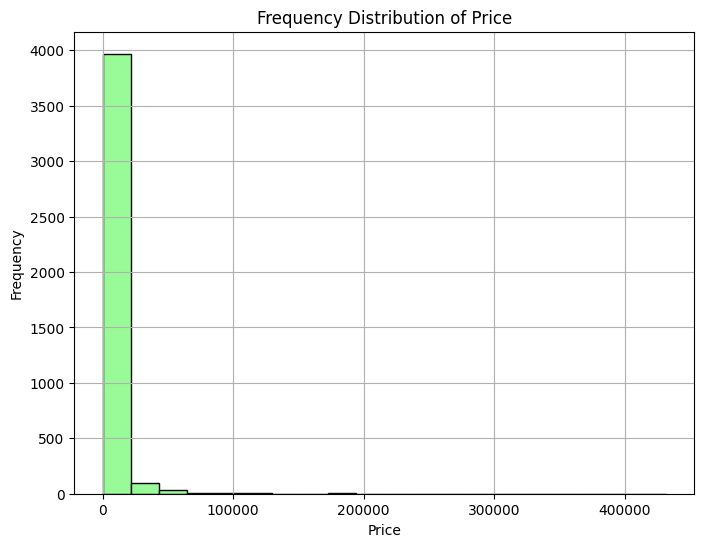

In [19]:
# Create a histogram for St.Francis

plt.figure(figsize=(8, 6))
plt.hist(dfsf['Price'], bins=20, color='palegreen', edgecolor='black')
plt.title('Frequency Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

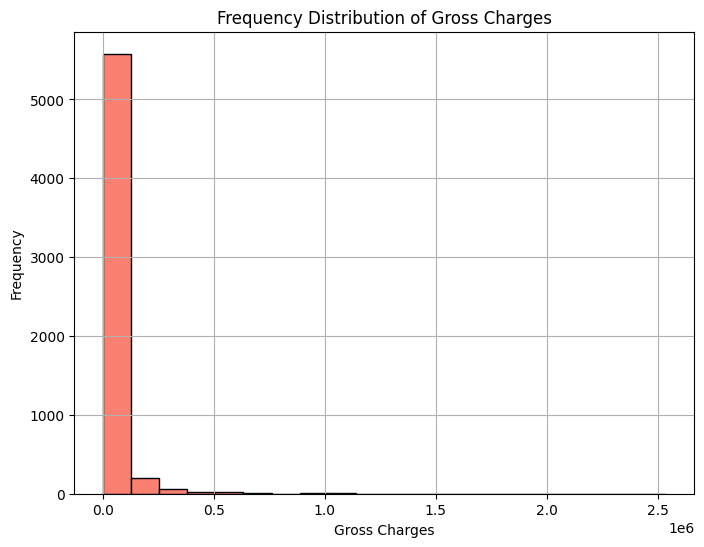

In [20]:
# Create a histogram for NYP

plt.figure(figsize=(8, 6))
plt.hist(dfnyp['Gross Charges'], bins=20, color='salmon', edgecolor='black')
plt.title('Frequency Distribution of Gross Charges')
plt.xlabel('Gross Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Observations:

*   NYP dataset provided more insurance information
*   St Francis Hospital provided more supplies information
*   Therefore, this was harder to compare






### 2. SQLite Database Operations:

In [21]:
# Create a local SQLite database called health.db

conn = sqlite3.connect('health.db')
cursor = conn.cursor()

#### Manually create table

In [22]:
# Create a table

cursor.execute("""
  CREATE TABLE IF NOT EXISTS sfh
              (
                  [Charge Description], text
                  [Package Size] float,
                  [Price] float,
                  [Charge Quantity] text,
                  [Package Description] text
              )
           """)
conn.commit()

In [23]:
# Confirming new table exists

cursor.execute("""
            SELECT name
            FROM sqlite_master
            WHERE type='table'
            ORDER BY name;
          """)

print(cursor.fetchall())

[('sfh',)]


In [24]:
# Insert values

cursor.execute('''
    INSERT INTO sfh
    VALUES
        ('XRX Ciprofloxacin hcl 0.3% OP solution', 5.0, 272.00, '5 mL', 'Bottle'),
        ('XRX Cisatracurium Besylate (PF) 200 mg/20 mL IV solution', 20.0, 1964.00, '20 mL', 'Vial')
''')

In [25]:
# Commit Changes

conn.commit()

In [26]:
cursor.execute('''
  SELECT * FROM sfh;
''')

print(cursor.fetchall())

[('XRX Ciprofloxacin hcl 0.3% OP solution', 5.0, 272.0, '5 mL', 'Bottle'), ('XRX Cisatracurium Besylate (PF) 200 mg/20 mL IV solution', 20.0, 1964.0, '20 mL', 'Vial')]


In [27]:
engine = create_engine('sqlite:///health.db')

In [28]:
sfh = pd.read_sql("select * from sfh;", conn)
sfh

,Charge Description,text,Price,Charge Quantity,Package Description
0,XRX Ciprofloxacin hcl 0.3% OP solution,5.0,272.0,5 mL,Bottle
1,XRX Cisatracurium Besylate (PF) 200 mg/20 mL I...,20.0,1964.0,20 mL,Vial


#### Automatically create table



In [29]:
# Load dataset

df_stfrancis = pd.read_excel('1043279565_st.-francis-hospital_standardcharges.xlsx')

In [30]:
# Push pandas df into sql table

df_stfrancis.to_sql('stfrancis', conn, if_exists='replace')

65032

In [32]:
# Look for table
query = '''
  SELECT *
  FROM stfrancis
  WHERE "Rev Code" = '301'
  LIMIT 30;
'''

# Creates a new df 'response'
response = pd.read_sql(query, conn)
response

,index,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,None,None,None,None,None
1,1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,None,None,None,None,None
2,2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,None,None,None,None,None
3,3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,None,None,None,None,None
4,15,3018391500,HC 5 NUCLEOTIDASE,301,83915,148.0,None,None,None,None,None
5,80,3018201300,HC ACETLYCHOLINESTERASE AMNIO FL,301,82013,381.0,None,None,None,None,None
6,81,3018201000,HC ACETONE QUANTITATIVE*C,301,82010,219.0,None,None,None,None,None
7,82,3018351901,HC ACETYLCHOLINE RECEP BLOCKING AB,301,83519,128.0,None,None,None,None,None
8,84,3018406000,HC ACID PHOSPHATASE,301,84060,223.0,None,None,None,None,None
9,88,3018202400,HC ACTH ADRENOCORT,301,82024,805.0,None,None,None,None,None
